In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import sparse
from mlp import ANN
import os
from PIL import Image

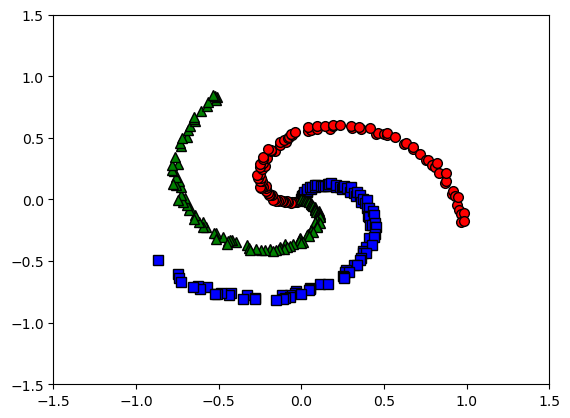

In [2]:
N = 100  # no. points per class
d0 = 2  # dimensionality
C = 3  # no. classes
X = np.zeros((d0, N*C))  # data matrix (each col = single sample)
y = np.zeros(N*C, dtype='uint8')

for j in range(C):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0, 1, N)  # radius
    t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.rand(N) * 0.2  # theta
    X[:, ix] = np.c_[r * np.sin(t), r * np.cos(t)].T
    y[ix] = j

plt.plot(X[0, :N], X[1, :N], 'bs', markersize=7, markeredgecolor='black')
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize=7, markeredgecolor='black')
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize=7, markeredgecolor='black')

plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.show()

In [3]:
# One-hot encoding
def convert_labels(y, C=C):
    """
    convert 1d label to a matrix label: each column of this 
    matrix coresponding to 1 element in y. In i-th column of Y, 
    only one non-zeros element located in the y[i]-th position, 
    and = 1 ex: y = [0, 2, 1, 0], and 3 classes then return

            [[1, 0, 0, 1],
             [0, 0, 1, 0],
             [0, 1, 0, 0]]
    """
    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y 

Y = convert_labels(y)

In [4]:
layers_dims = [d0, 100, C]
ann = ANN()
parameters, costs = ann.build_model(X, Y, layers_dims, num_iterations=100000, 
                                    verbose=True, learning_rate=0.1, is_draw=True)

Cost after iteration 0: 13.452831567295334
Cost after iteration 500: 3.286906436023096
Cost after iteration 1000: 2.057642881693152
Cost after iteration 1500: 1.8948836095966606
Cost after iteration 2000: 1.793183936407686
Cost after iteration 2500: 1.7161861218945744
Cost after iteration 3000: 1.6542295057068508
Cost after iteration 3500: 1.6021411187525973
Cost after iteration 4000: 1.557480655912023
Cost after iteration 4500: 1.5182008668785532
Cost after iteration 5000: 1.4831750238843067
Cost after iteration 5500: 1.4514576435852757
Cost after iteration 6000: 1.4221787192762902
Cost after iteration 6500: 1.3948008704317485
Cost after iteration 7000: 1.369291765794172
Cost after iteration 7500: 1.345260577842353
Cost after iteration 8000: 1.3228804946802275
Cost after iteration 8500: 1.3022079643543178
Cost after iteration 9000: 1.2828112207700557
Cost after iteration 9500: 1.264149881920226
Cost after iteration 10000: 1.245956595876506
Cost after iteration 10500: 1.228289838530663

In [5]:
acc = ann.predict(X, y, parameters)
print(acc)

0.9033333333333335


In [6]:
def create_gif(img_dir, output_file, duration=500):
    # List of image filenames
    image_files = os.listdir(img_dir)
    image_files = sorted(image_files, key=lambda filename: int(filename.split(': ')[1].split('.')[0]))
    image_paths = [os.path.join(img_dir, img_file) for img_file in image_files]
    # Open the first image to get its size
    first_image = Image.open(image_paths[0])
    size = first_image.size

    # Change size
    old_w, old_h = size
    scale = old_w / old_h
    new_w = 640
    new_h = int(new_w / scale)

    images = []

    try:
        for img in image_paths:
            #images.append(Image.open(img))
            images.append(Image.open(img).resize((new_w, new_h)))
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

    # Create a GIF file
    #with Image.new('RGB', size) as gif:
    with Image.new('RGB', (new_w, new_h)) as gif:
        gif.save(output_file, save_all=True, append_images=images, duration=duration, loop=0)

    #shutil.rmtree(img_dir)

create_gif('./asset', './ann.gif', duration=200)

In [ ]:
!rm -rf asset